In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import glob
import os
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

In [5]:
from matplotlib.collections import LineCollection
def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)
    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    # ax.autoscale()
    return lc

/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_80226/3784817863.py:159: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  p1=plt.plot(r,C_r, "o-", color=cm(p_list[j]), label=str(p_list[j]),ls='None') #データ点をプロット
/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_80226/3784817863.py:183: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(P,D,"-o",ls='None') #データ点をプロット


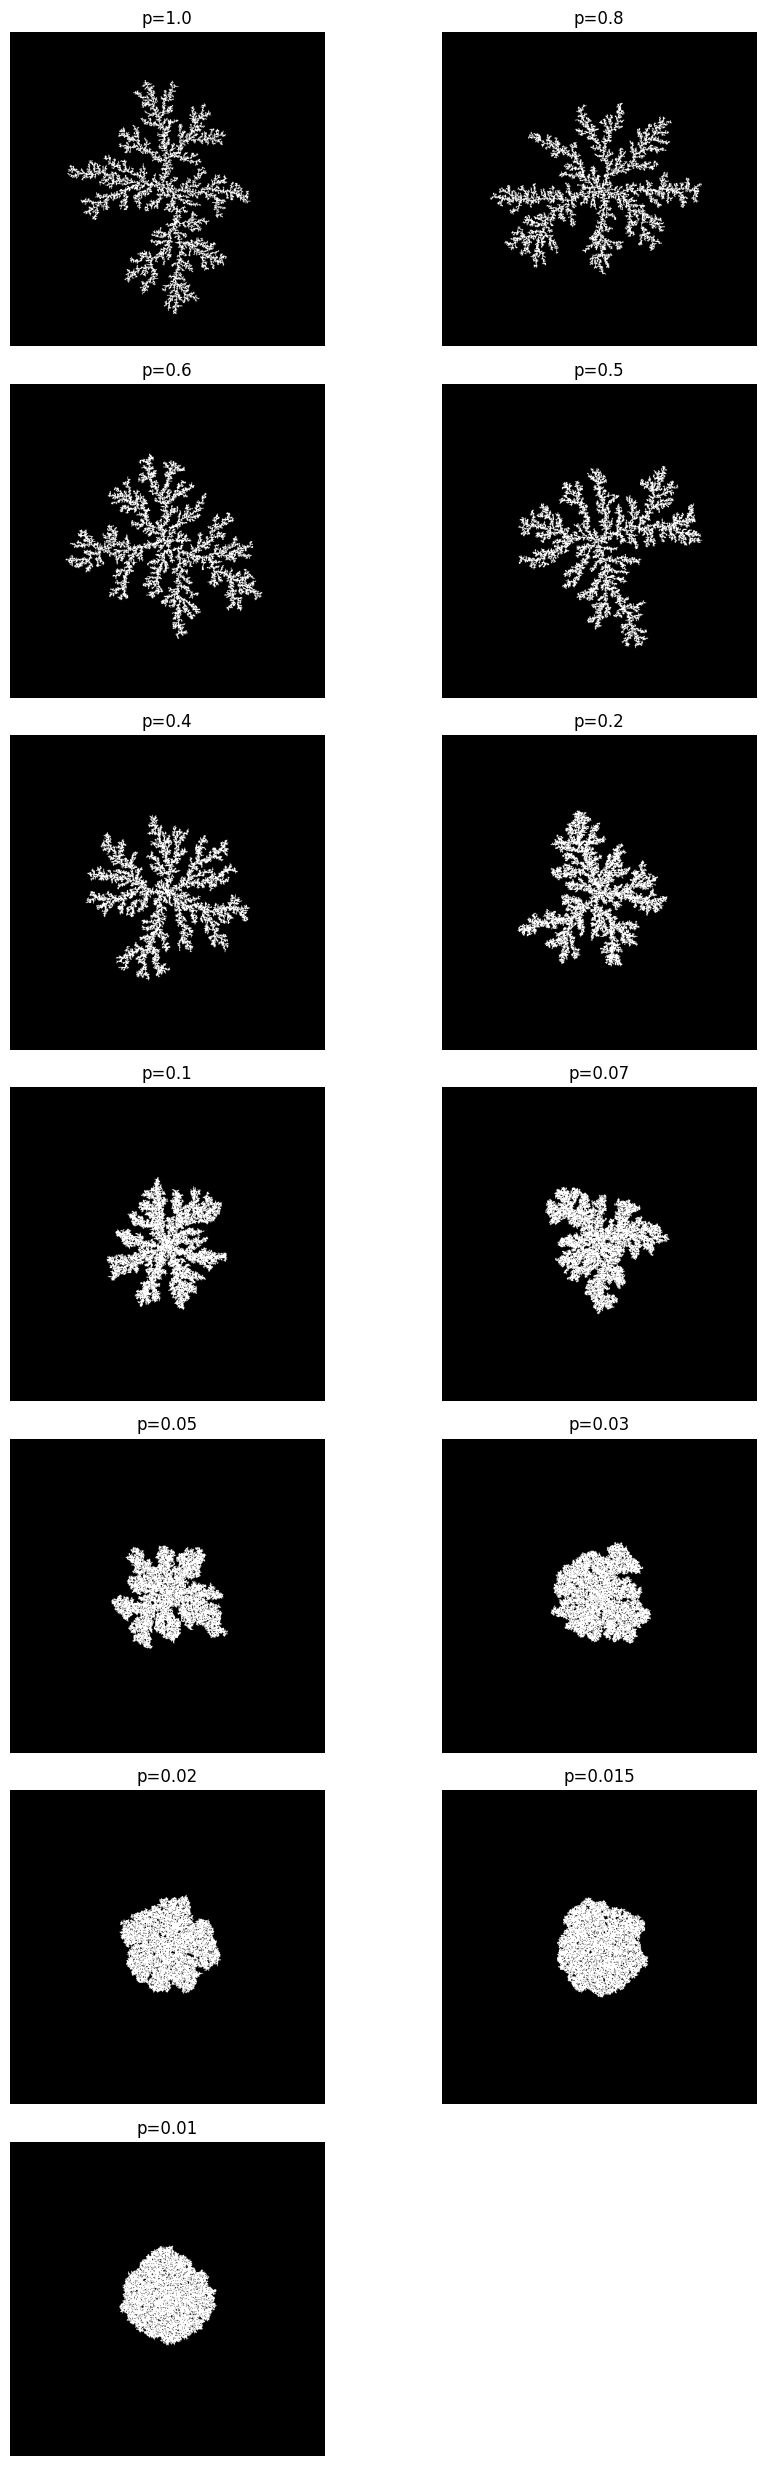

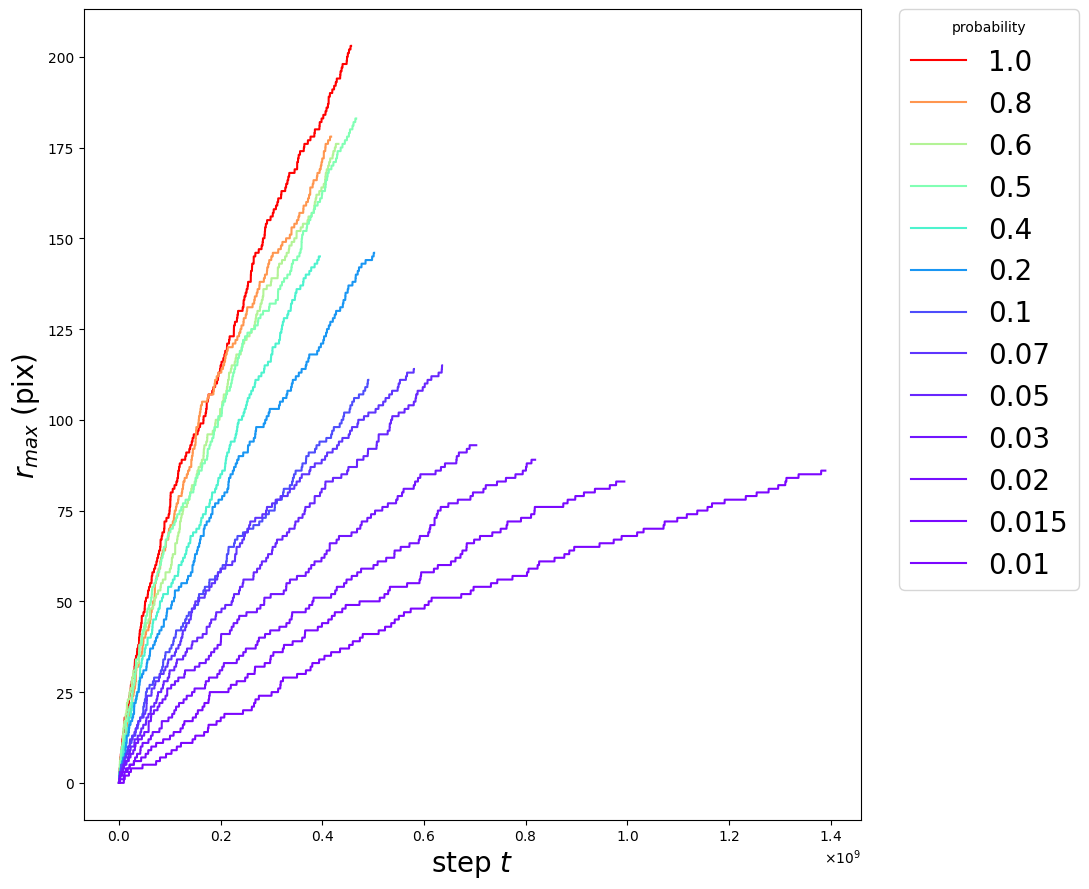

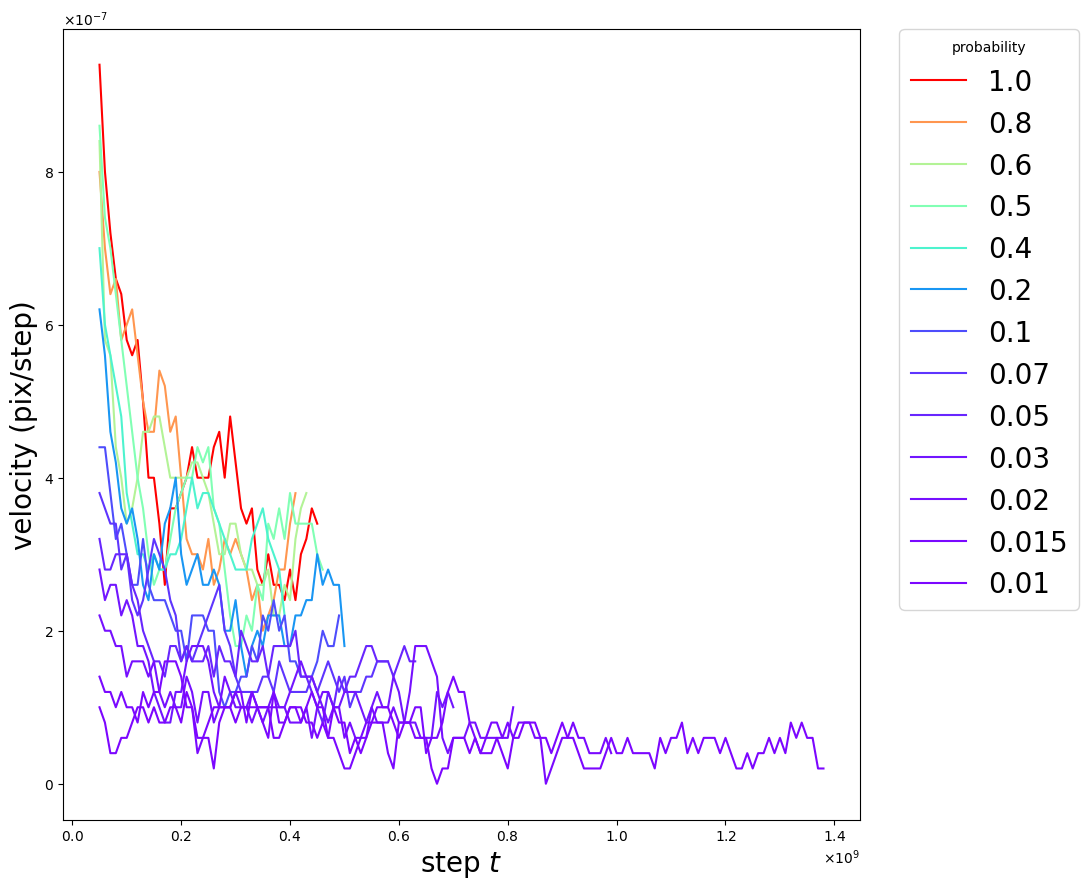

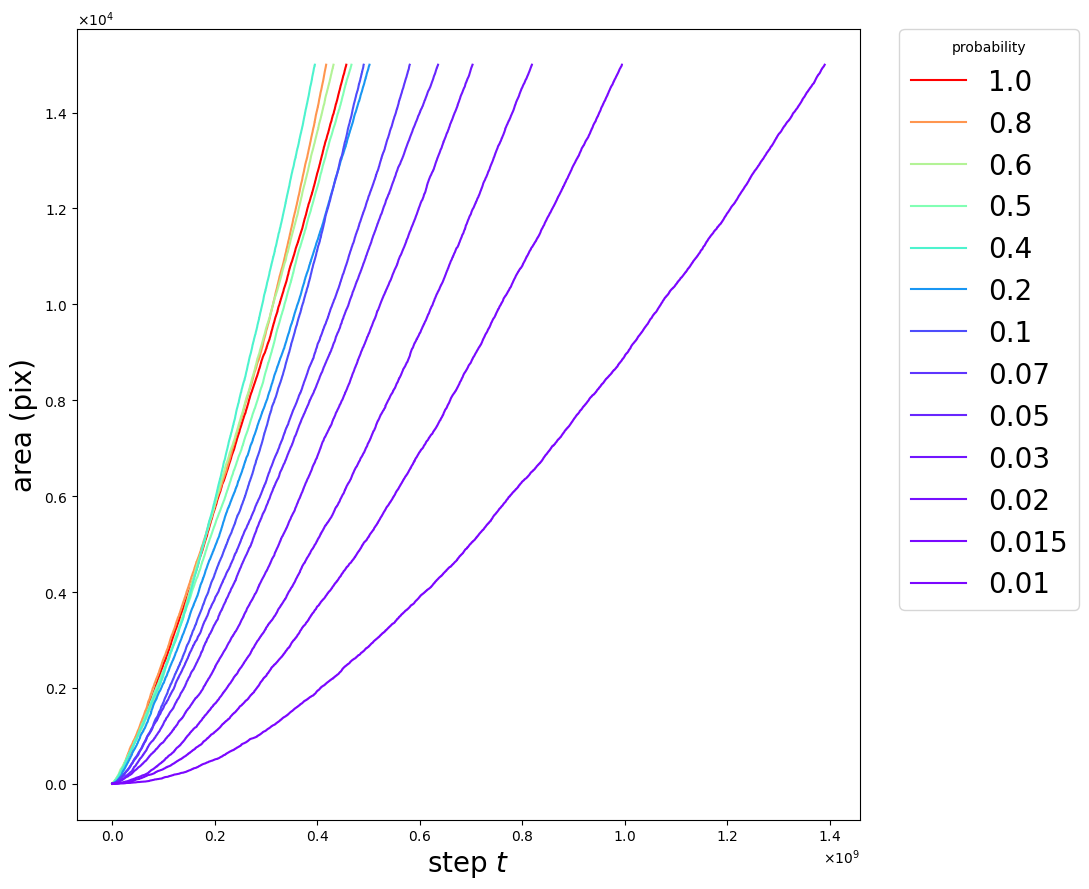

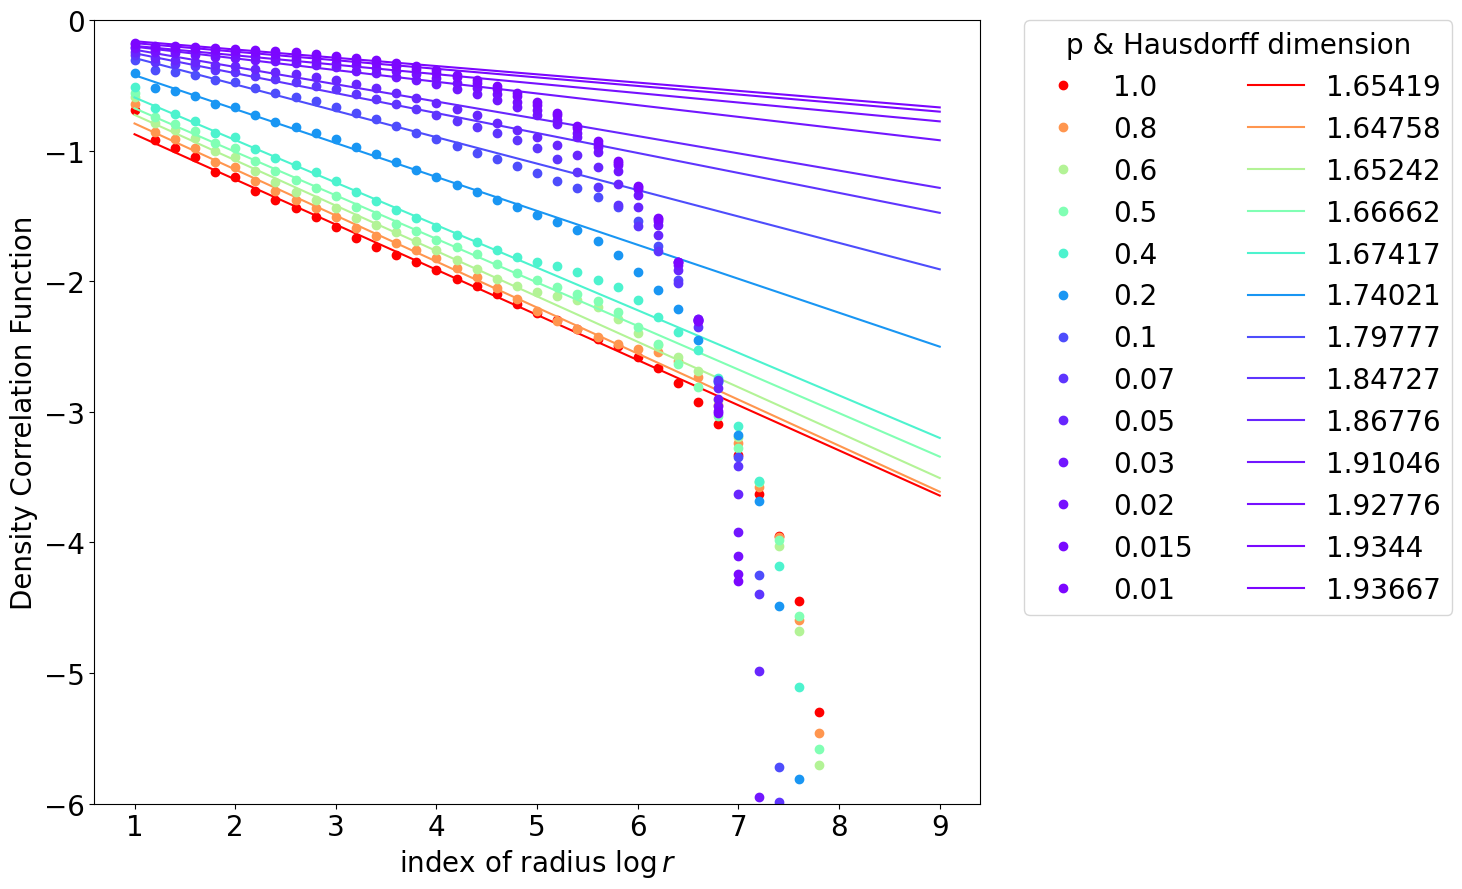

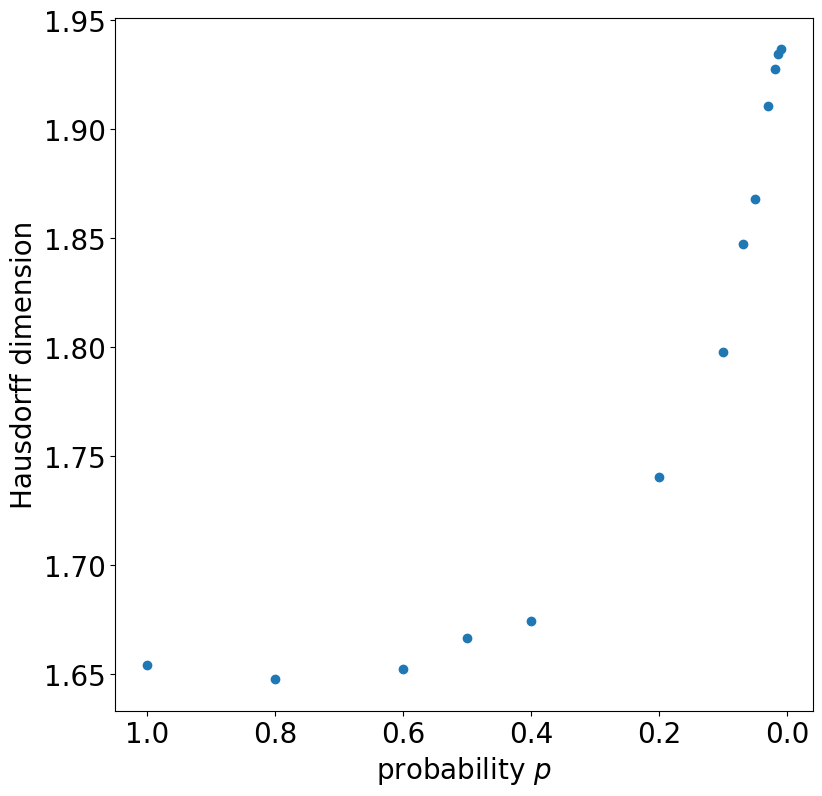

In [84]:
#フォルダ名取得&並べ替え(確率大きい順)
sim_list = glob.glob('sim_data/*.dat')
sim_list.sort(reverse=True)

front_list=glob.glob('frontline_data/*.dat')
front_list.sort(reverse=True)

den_cor_fun_list=glob.glob('den_cor_fun_data/*.dat')
den_cor_fun_list.sort(reverse=True)

#リスト定義
sim=[[] for i in range(len(sim_list))]
front=[[] for i in range(len(front_list))]
den_cor_fun=[[] for i in range(len(den_cor_fun_list))]
flsp=[[] for i in range(len(sim_list))]

#データ読み込み
for i in range(0,len(sim_list)):
    str_sim=sim_list[i] #string　of file name
    p=float(str_sim[-9:-4]) #固着確率
    tmp=np.loadtxt(sim_list[i])
    sim[i]=[p,tmp]

for i in range(0,len(front_list)):
    str_front=front_list[i] #string　of file name
    p=float(str_front[-9:-4]) #固着確率
    tmp=np.loadtxt(front_list[i])
    front[i]=[p,tmp]
    
for i in range(0,len(den_cor_fun_list)):
    str_den_cor_fun=den_cor_fun_list[i] #string　of file name
    p=float(str_den_cor_fun[-9:-4]) #固着確率
    tmp=np.loadtxt(den_cor_fun_list[i])
    den_cor_fun[i]=[p,tmp]
    
#確率のリストの生成
p_list=[]
for j in range(0,len(sim_list)):
    p_list.append(sim[j][0])
                  
    
# DLA&RLA
cm = plt.cm.get_cmap('rainbow')
fig = plt.figure(figsize=(9, 25))
column=int(Decimal(str(len(sim_list)/2)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))

#一括表示
for j in range(0,len(sim_list)):
    fig = plt.subplot(column,2, j+1)
    plt.tight_layout()
    plt.title("p="+str(sim[j][0]))
    plt.axis("off")
    
    plt.imshow(sim[j][1], cmap="gray")

# #個別表示
# for j in range(0,len(sim_list)):
#     fig=plt.subplots()
#     plt.tight_layout()
#     plt.title("p="+str(sim[j][0]))
#     plt.axis("off")
    
#     plt.imshow(sim[j][1], cmap="gray")


#frontline
fig, ax = plt.subplots(figsize=(11, 9))
for j in range(0,len(front_list)):
    plt.tight_layout()
    plt.plot(front[j][1][:,0],front[j][1][:,1], color=cm(p_list[j]), label=p_list[j])
    
    ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
    ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0))   # 10の指数標記
    
    ax.set_xlabel("step $t$",fontsize=20)
    ax.set_ylabel("$r_{max}$ (pix)",fontsize=20)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="probability",fontsize=20)
    

#frontline speed (moving average)
fig, ax = plt.subplots(figsize=(11, 9))
for j in range(0,len(front_list)):
    flsp_tmp=[]
    step_tmp=[]
    for i in range(0,int(len(front[j][1][:,0])/1000)):
        if  (i+1)*1000<len(front[j][1][:,0]) :#1000stepごとに計算
            sp=(front[j][1][(i+1)*1000,1]-front[j][1][i*1000,1])/(front[j][1][(i+1)*1000,0]-front[j][1][i*1000,0])
            flsp_tmp=np.append(flsp_tmp, sp)
            step_tmp=np.append(step_tmp,front[j][1][(i+1)*1000,0])
    flsp_tmp=np.convolve(flsp_tmp,np.ones(5)/5, mode='valid')
    step_tmp=np.delete(step_tmp,slice(0,4))
    
    flsp_tmp=flsp_tmp.reshape(len(flsp_tmp),1)
    step_tmp=step_tmp.reshape(len(step_tmp),1)
   
    sp_dat=np.append(step_tmp,flsp_tmp,axis=1)
    flsp[j]=sp_dat
    plt.tight_layout()
    plt.plot(flsp[j][:,0],flsp[j][:,1], color=cm(p_list[j]), label=p_list[j])
    
    ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
    ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0))   # 10の指数標記
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
    ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0))   # 10の指数標記
    
    ax.set_xlabel("step $t$",fontsize=20)
    ax.set_ylabel("velocity (pix/step)",fontsize=20)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="probability",fontsize=20)
    
#area  
fig, ax = plt.subplots(figsize=(11, 9))
for j in range(0,len(front_list)):
    plt.tight_layout()
    plt.plot(front[j][1][:,0],front[j][1][:,2], color=cm(p_list[j]), label=p_list[j])
    
    ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
    ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0))   # 10の指数標記,x軸
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
    ax.ticklabel_format(style="sci", axis="y", scilimits=(0,0))   # 10の指数標記,y軸
    
    ax.set_xlabel("step $t$",fontsize=20)
    ax.set_ylabel("area (pix)",fontsize=20)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="probability",fontsize=20)
    
#Dencity Correlation Function
fig , ax = plt.subplots(figsize=(10, 9))
P=[]
D=[]
for j in range(0,len(den_cor_fun_list)):
    plt.tight_layout()
    
    #特徴的長さの抽出(線型フィットでどこまでの値を使うかの決定)
    rmax=max(front[j][1][:,1])
    k=0
    while pow(2,den_cor_fun[j][1][k,0])<=rmax/5:
        k+=1
    k_f=int(k)    #k_fittingの略。最大半径の5分の1にしたのは落ち始めるのがこのくらいだから。最大半径に対して円を5つ入れて(直径に対して10個)相関関数を計測するのでこの辺りがいい精度の限界か？
    
    r=den_cor_fun[j][1][:,0]#半径の指数、底は2
    C_r=den_cor_fun[j][1][:,1] #the value of Dencity Correration Function

    r=np.array(r)
    C_r=np.array(C_r) #各行を1次元配列に変換

    z=np.polyfit(r[1:k_f],C_r[1:k_f],1) #r,C_rでの線型フィットの係数a,bを求めている。1からなのは2^1での誤差が格子シミュレーションだと大きいから。DLAの論文（ウィットン、サンダー）参照

    r_line=np.arange(1,10) #グラフを表示する区間
    L = np.poly1d(z) #求めたa,bを1次式で表示,ax+b
    Df=round(2+z[0],5) #フラクタル次元2+a,a<0なので2未満になる。偶数への丸めなので注意
    
    P=np.append(P,p_list[j])
    D=np.append(D,Df)
        
    p1=plt.plot(r,C_r, "o-", color=cm(p_list[j]), label=str(p_list[j]),ls='None') #データ点をプロット
    p2=plt.plot(r_line, L(r_line),color=cm(p_list[j]),label=str(Df)) #線型フィットの描画
    plt.ylim(-6,0)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel("Density Correlation Function",fontsize=20)
    plt.xlabel("index of radius $\log{r}$",fontsize=20)
    
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#make legend label order
odd=[]
even=[]
order=[]
length=len(sim_list)
for i in range(0,length):
    even.append(2*i)
    odd.append(2*i+1)
order=np.append(even,odd)

legend_p1= plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="p & Hausdorff dimension",fontsize=20,title_fontsize=20,ncol=2)

fig , ax = plt.subplots(figsize=(9, 9))
plt.plot(P,D,"-o",ls='None') #データ点をプロット
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Hausdorff dimension",fontsize=20)
plt.xlabel("probability $p$",fontsize=20)
ax.invert_xaxis()

plt.show()

In [7]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#固着確率用リスト
p_list=[]
for i in range(1,11,3):
    p_list.append(i/10)
    
print(p_list)
#電圧用リスト
V_list=[]
for i in range(1,4):
    V_list.append(i*1.0)

file_list=[[]for i in range(25)]

fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")



fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=[r"time ($\times$2 s)","rmax (pix)","area(pix)","branch_num ","branch_mean (pix)","branch_median (pix)"]
unit=11/681 #単位はcm/pix
plt.rcParams["font.size"] = 15

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
for i in range(5):
    for j in range(i+1,5):
        fig, ax = plt.subplots()
        for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
            ax.plot(fl[k][:,i],fl[k][:,j],color="r", label="")
        ax.plot(fl[3][:,i],fl[3][:,j],color="r", label="non")
        plt.legend()
        
        for k in [4,5,6]: #0.005%sur
            ax.plot(fl[k][:,i],fl[k][:,j],  color="orange", label="")
        ax.plot(fl[4][:,i],fl[4][:,j],color="orange", label="0.005%")
        plt.legend()
    
        for k in [7,8,12,13,17,18]: #0.01%sur
            ax.plot(fl[k][:,i],fl[k][:,j],  color="gold", label="")
        ax.plot(fl[7][:,i],fl[7][:,j],color="gold", label="0.01%")
        plt.legend()
    
        for k in [21,22,23,24]: #0.03%sur
            ax.plot(fl[k][:,i],fl[k][:,j],  color="b", label="")   
        ax.plot(fl[21][:,i],fl[21][:,j],color="b", label="0.03%")
        plt.legend()

        for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
            ax.plot(fl[k][:,i],fl[k][:,j],  color="purple", label="")
        ax.plot(fl[1][:,i],fl[1][:,j],color="purple", label="0.05%")
        plt.legend()
        
        plt.tick_params(labelsize=12)
        ax.set_xlabel(label[i])
        ax.set_ylabel(label[j])
        


plt.legend()
plt.show

FileNotFoundError: /Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat not found.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


'\nc=np.full((len(fl[0]),1),C[4])\nprint(c)\n\nlen(fl[0])\n\nfl[0]=np.append(fl[0],c,axis=1)\n\nfl[0]\n'

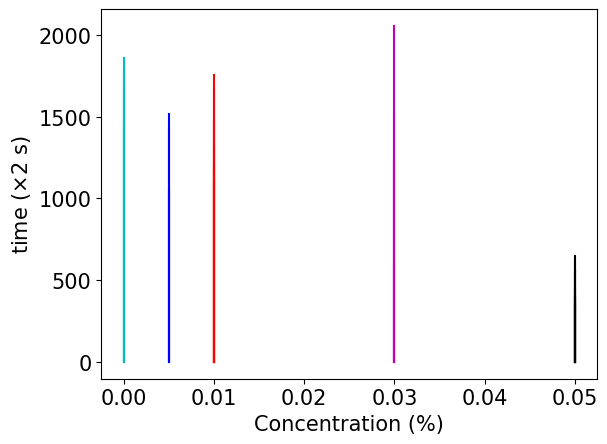

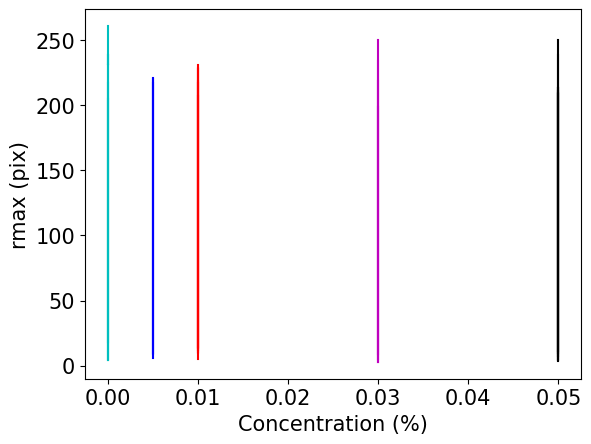

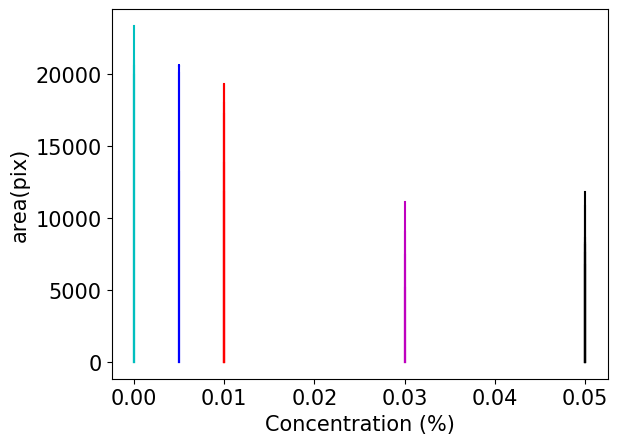

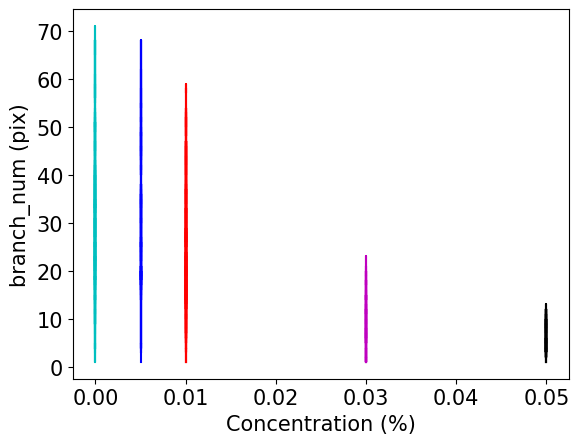

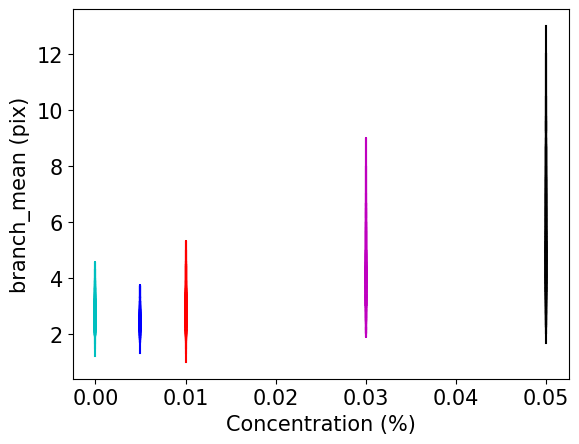

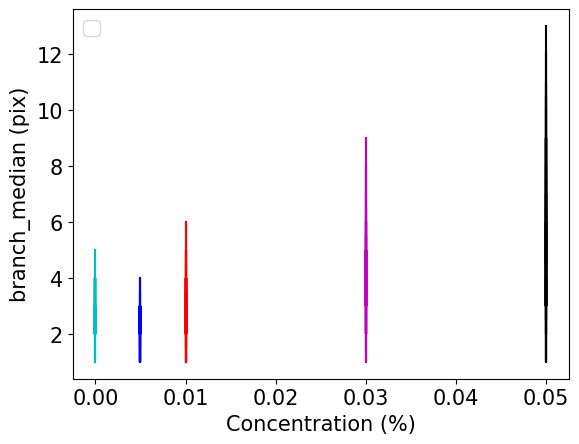

In [106]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
C=[0 , 0.005 , 0.01 , 0.03 , 0.05] #濃度リスト

label=[r"time ($\times$2 s)","rmax (pix)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)","Concentration (%)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median,6=surfactant_concentration

i=6
    
for j in range(0,6):
    fig, ax = plt.subplots()
    for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
        c=np.full((len(fl[k]),1),C[0])
        fl[k]=np.append(fl[k],c,axis=1)
        ax.plot(fl[k][:,i],fl[k][:,j],color="c", label="")
        
    for k in [4,5,6]: #0.005%sur
        c=np.full((len(fl[k]),1),C[1])
        fl[k]=np.append(fl[k],c,axis=1)
        ax.plot(fl[k][:,i],fl[k][:,j],  color="b", label="")

    for k in [7,8,12,13,17,18]: #0.01%sur
        c=np.full((len(fl[k]),1),C[2])
        fl[k]=np.append(fl[k],c,axis=1)
        ax.plot(fl[k][:,i],fl[k][:,j],  color="r", label="")

    for k in [21,22,23,24]: #0.03%sur
        c=np.full((len(fl[k]),1),C[3])
        fl[k]=np.append(fl[k],c,axis=1)
        ax.plot(fl[k][:,i],fl[k][:,j],  color="m", label="")   

    for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
        c=np.full((len(fl[k]),1),C[4])
        fl[k]=np.append(fl[k],c,axis=1)
        ax.plot(fl[k][:,i],fl[k][:,j],  color="k", label="")

    ax.set_xlabel(label[i])
    ax.set_ylabel(label[j])

plt.legend()
plt.show


"""
c=np.full((len(fl[0]),1),C[4])
print(c)

len(fl[0])

fl[0]=np.append(fl[0],c,axis=1)

fl[0]
"""

/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/939535703.py:150: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(Con[i],D_f[i], "o-",color="r", ls='None') #データ点をプロット
/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/939535703.py:152: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(Con[i],D_f[i], "o-",color="orange", ls='None') #データ点をプロット
/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/939535703.py:154: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(Con[i],D_f[i], "o-",color="gold", ls='None') #データ点をプロット
/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/i

<function matplotlib.pyplot.show(close=None, block=None)>

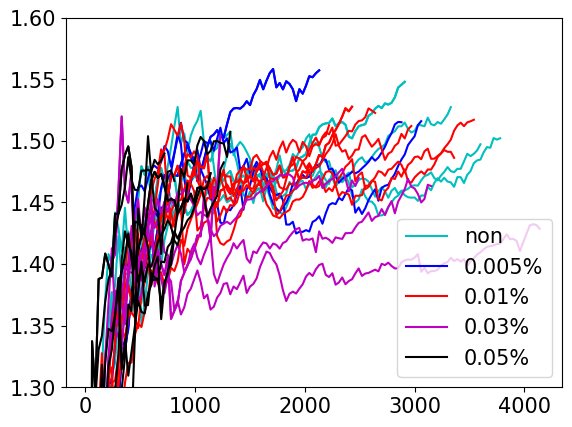

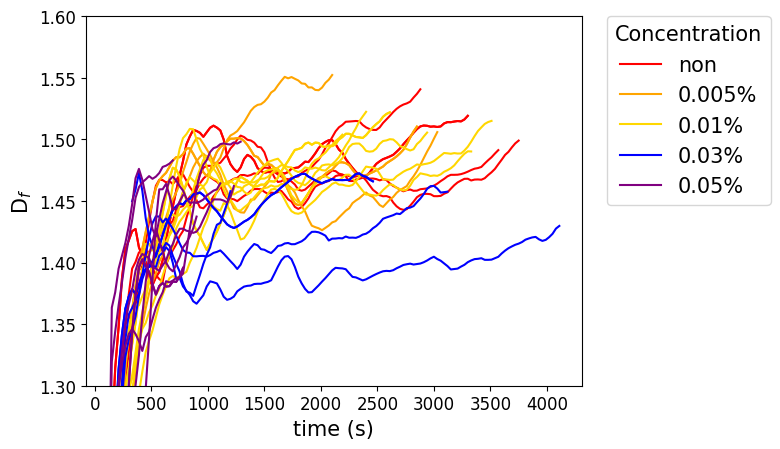

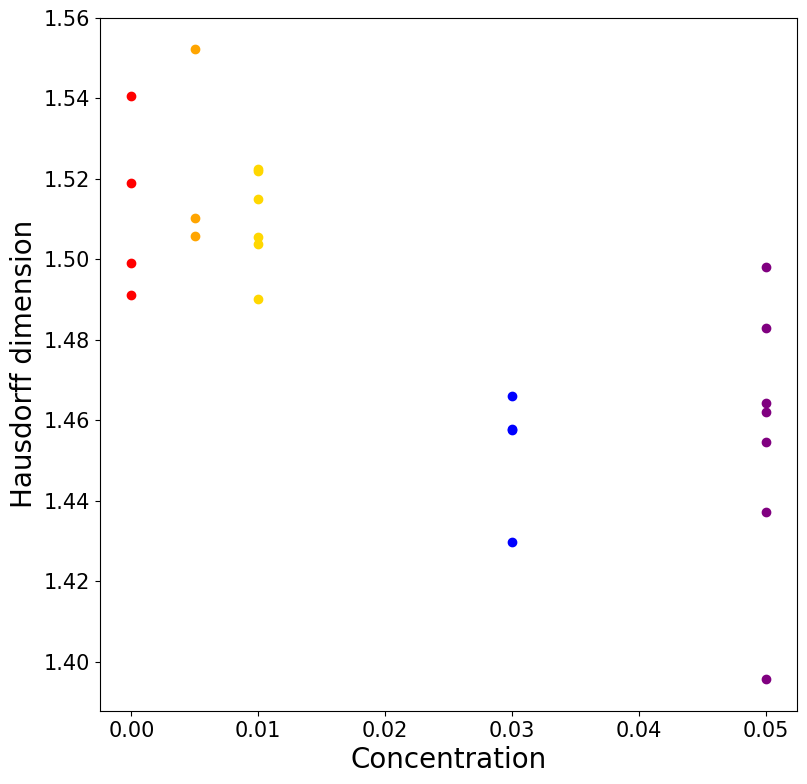

In [62]:
DIR = 'D:\dendrite_data\edited_data\analisys_data'

print(sum(os.path.isfile(os.path.join(DIR, name)) for name in os.listdir(DIR)))


fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data//20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/housedolf_dim_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
C=[0 , 0.005 , 0.01 , 0.03 , 0.05] #濃度リスト

label=["time (s)",r"D$_{f}$"]
plt.rcParams["font.size"] = 15

#表示する値,0=time,1=D_f
i=0
j=1

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur
    ax.plot(fl[k][:,i]*2,fl[k][:,j],color="c", label="")
ax.plot(fl[3][:,i]*2,fl[3][:,j],color="c", label="non")
plt.legend()
        
for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j],  color="b", label="")
ax.plot(fl[4][:,i]*2,fl[4][:,j],color="b", label="0.005%")
plt.legend()
            
for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j],  color="r", label="")
ax.plot(fl[7][:,i]*2,fl[7][:,j],color="r", label="0.01%")
plt.legend()
        

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j],  color="m", label="") 
ax.plot(fl[21][:,i]*2,fl[21][:,j],color="m", label="0.03%")
plt.legend()
        

for k in [1,2,9,10,11,19,20]: #0.05%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j],  color="k", label="")
ax.plot(fl[1][:,i]*2,fl[1][:,j],color="k", label="0.05%")
plt.legend()
ax.set_ylim(1.3,1.6)

#移動平均をとる
fig, ax = plt.subplots()
Con=[]
D_f=[]
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    df_tmp=np.convolve(fl[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
        
    Con=np.append(Con,0)
    D_f=np.append(D_f,df_tmp[len(df_tmp)-1]) #フラクタル次元の最後の値と濃度の保存。以下も同じ
    
    ax.plot(t_tmp ,df_tmp,  color="r", label="")
ax.plot(t_tmp ,df_tmp,  color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    df_tmp=np.convolve(fl[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    
    Con=np.append(Con,0.005)
    D_f=np.append(D_f,df_tmp[len(df_tmp)-1]) 
    
    ax.plot(t_tmp ,df_tmp,  color="orange", label="")
ax.plot(t_tmp ,df_tmp,  color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    df_tmp=np.convolve(fl[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    
    Con=np.append(Con,0.01)
    D_f=np.append(D_f,df_tmp[len(df_tmp)-1])

    ax.plot(t_tmp ,df_tmp,  color="gold", label="")
ax.plot(t_tmp ,df_tmp,  color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    df_tmp=np.convolve(fl[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
        
    Con=np.append(Con,0.03)
    D_f=np.append(D_f,df_tmp[len(df_tmp)-1])

    ax.plot(t_tmp ,df_tmp,  color="b", label="")
ax.plot(t_tmp ,df_tmp,  color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur
    df_tmp=np.convolve(fl[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
        
    Con=np.append(Con,0.05)
    D_f=np.append(D_f,df_tmp[len(df_tmp)-1])

    ax.plot(t_tmp ,df_tmp,  color="purple", label="")
ax.plot(t_tmp ,df_tmp,  color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
plt.tick_params(labelsize=12)
ax.set_xlabel(label[i])
ax.set_ylabel(label[j])
ax.set_ylim(1.3,1.6)

fig,ax=plt.subplots(figsize=(9,9))
for i in range (0,len(Con)):
    if Con[i]==0:
        ax.plot(Con[i],D_f[i], "o-",color="r", ls='None') #データ点をプロット
    elif Con[i]==0.005:
        ax.plot(Con[i],D_f[i], "o-",color="orange", ls='None') #データ点をプロット
    elif Con[i]==0.01:
        ax.plot(Con[i],D_f[i], "o-",color="gold", ls='None') #データ点をプロット
    elif Con[i]==0.03:
        ax.plot(Con[i],D_f[i], "o-",color="b", ls='None') #データ点をプロット
    elif Con[i]==0.05:
        ax.plot(Con[i],D_f[i], "o-",color="purple", ls='None') #データ点をプロット

ax.set_ylabel("Hausdorff dimension",fontsize=20)
ax.set_xlabel("Concentration",fontsize=20)

plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

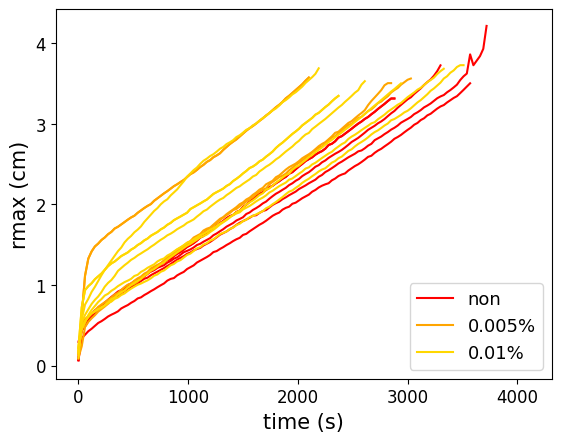

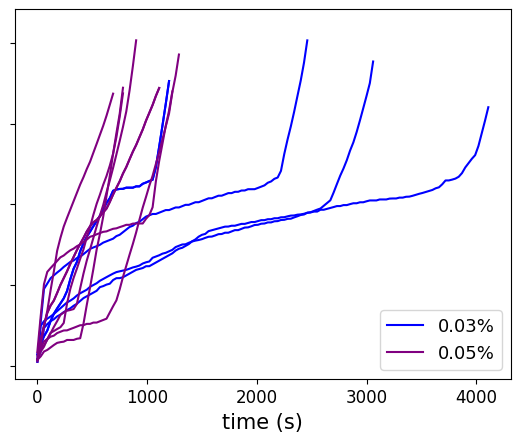

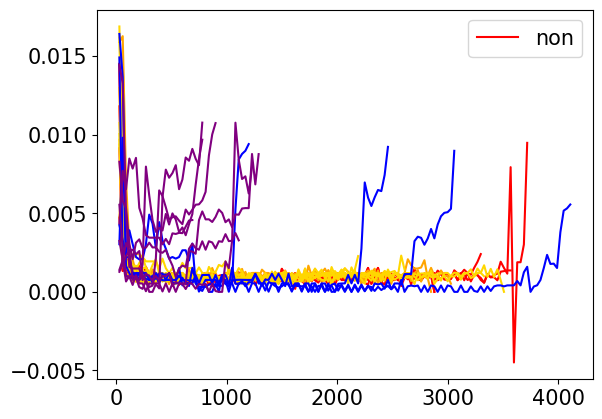

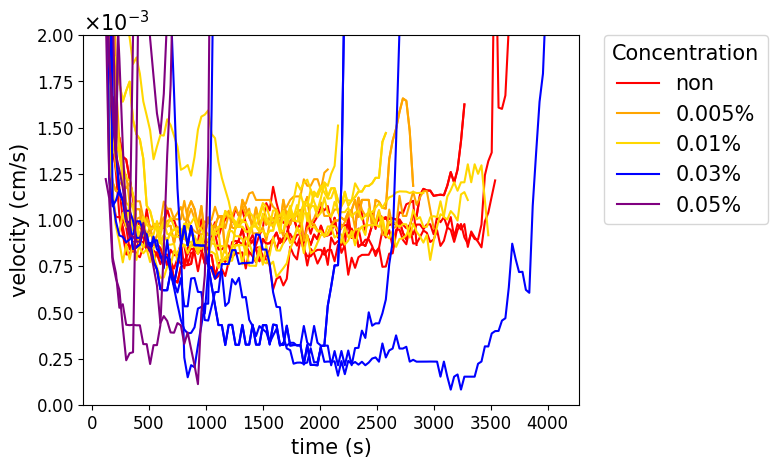

In [47]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)"]
plt.rcParams["font.size"] = 15
#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median

unit=11/681 #単位はcm/pix
i=0
j=1

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,color="r", label="")
ax.plot(fl[3][:,i]*2,fl[3][:,j]*unit,color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="orange", label="")
ax.plot(fl[4][:,i]*2,fl[4][:,j]*unit,color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="gold", label="")
ax.plot(fl[7][:,i]*2,fl[7][:,j]*unit,color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="b", label="",alpha=0)   #範囲を揃えて表示したいため、透明化している
#ax.plot(fl[21][:,i]*2,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="purple", label="",alpha=0)
#ax.plot(fl[1][:,i]*2,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.tick_params(labelsize=12)
ax.set_xlabel(label[i])
ax.set_ylabel(label[j])

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,color="r", label="",alpha=0)#範囲を揃えて表示したいため、透明化している
#ax.plot(fl[3][:,i]*2,fl[3][:,j]*unit,color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="orange", label="",alpha=0)
#ax.plot(fl[4][:,i]*2,fl[4][:,j]*unit,color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="gold", label="",alpha=0)
#ax.plot(fl[7][:,i]*2,fl[7][:,j]*unit,color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="b", label="")   
ax.plot(fl[21][:,i]*2,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="purple", label="")
ax.plot(fl[1][:,i]*2,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.tick_params(labelsize=12)
ax.set_xlabel(label[i])
ax.tick_params(labelleft=False)
#ax.set_ylabel(label[j])



i=0
j=1
v=[[] for i in range(25)]
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],color="r", label="")
ax.plot(v[3][:,i],v[3][:,j],color="r", label="non")
plt.legend()

for k in [4,5,6]: #0.005%sur
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],  color="orange", label="")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],  color="gold", label="")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],color="b", label="")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],  color="purple", label="")
plt.legend()

#移動平均をとる
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)#4を足すのは、初めの4つは移動平均の計算で弾かれてしまうため、実質的な時間が5行目からなので
    ax.plot(t_tmp ,v_tmp,  color="r", label="")
ax.plot(t_tmp ,v_tmp,  color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="orange", label="")
ax.plot(t_tmp ,v_tmp,  color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="gold", label="")
ax.plot(t_tmp ,v_tmp,  color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="b", label="")
ax.plot(t_tmp ,v_tmp,  color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="purple", label="")
ax.plot(t_tmp ,v_tmp,  color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.tick_params(labelsize=12)
ax.set_xlabel("time (s)")
ax.set_ylabel("velocity (cm/s)")  
ax.set_ylim(0,0.002)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))   # 10^3（10の3乗）単位にする。

plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

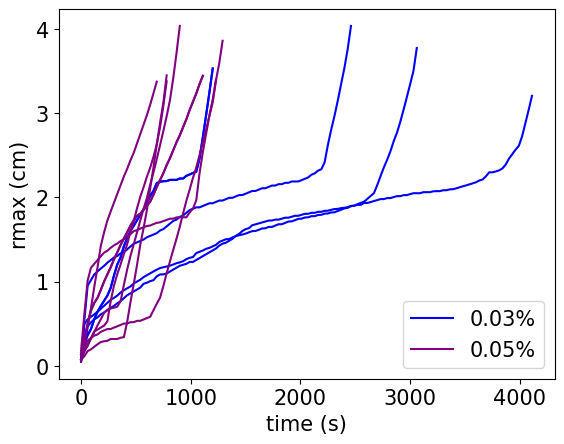

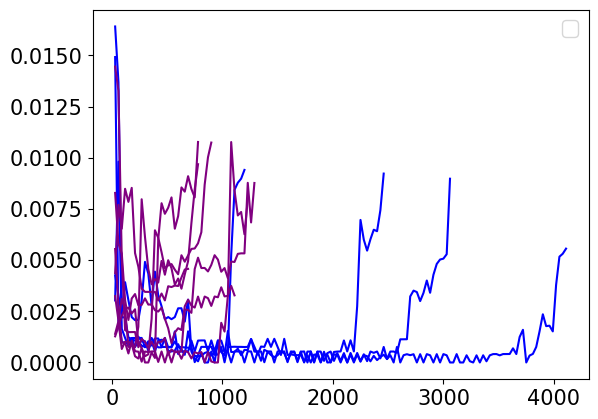

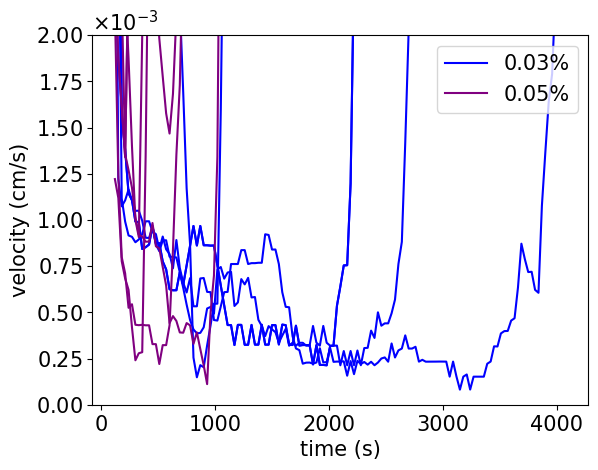

In [9]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num ","branch_mean (pix)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median

unit=11/681 #単位はcm/pix
i=0
j=1

fig, ax = plt.subplots()
for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="b", label="")   
ax.plot(fl[21][:,i]*2,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="purple", label="")
ax.plot(fl[1][:,i]*2,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend()

ax.set_xlabel(label[i])
ax.set_ylabel(label[j])

i=0
j=1
v=[[] for i in range(25)]
fig, ax = plt.subplots()
for k in [21,22,23,24]: #0.03%sur
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],color="b", label="")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    for t in range(0,len(fl[k])-1):
        v[k].append([t*30+30,(fl[k][t+1,1]-fl[k][t,1])*unit/30])
    v[k]=np.array(v[k])
    ax.plot(v[k][:,i],v[k][:,j],  color="purple", label="")
plt.legend()

#移動平均をとる
fig, ax = plt.subplots()
for k in [21,22,23,24]: #0.03%sur
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="b", label="")
ax.plot(t_tmp ,v_tmp,  color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    v_tmp=np.convolve(v[k][:,1],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(v[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,v_tmp,  color="purple", label="")
ax.plot(t_tmp ,v_tmp,  color="purple", label="0.05%")
plt.legend()
    
ax.set_xlabel("time (s)")
ax.set_ylabel("velocity (cm/s)")  
ax.set_ylim(0,0.002)

ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))   # 10^3（10の3乗）単位にする。

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

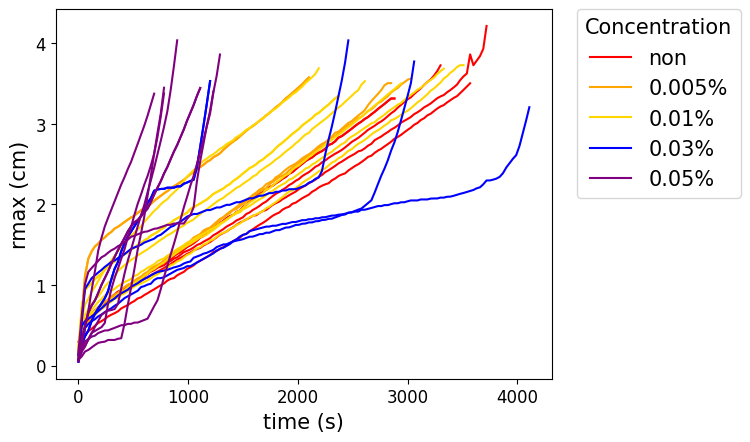

In [6]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)"]
plt.rcParams["font.size"] = 15

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
unit=11/681 #単位はcm/pix
i=0
j=1
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,color="r", label="")
ax.plot(fl[3][:,i]*2,fl[3][:,j]*unit,color="r", label="non")
plt.legend(fontsize=13)

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="orange", label="")
ax.plot(fl[4][:,i]*2,fl[4][:,j]*unit,color="orange", label="0.005%")
plt.legend(fontsize=13)

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="gold", label="")
ax.plot(fl[7][:,i]*2,fl[7][:,j]*unit,color="gold", label="0.01%")
plt.legend(fontsize=13)

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="b", label="")   
ax.plot(fl[21][:,i]*2,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend(fontsize=13)

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*2,fl[k][:,j]*unit,  color="purple", label="")
ax.plot(fl[1][:,i]*2,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend(fontsize=13)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
plt.tick_params(labelsize=12)
ax.set_xlabel(label[i])
ax.set_ylabel(label[j])
        
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

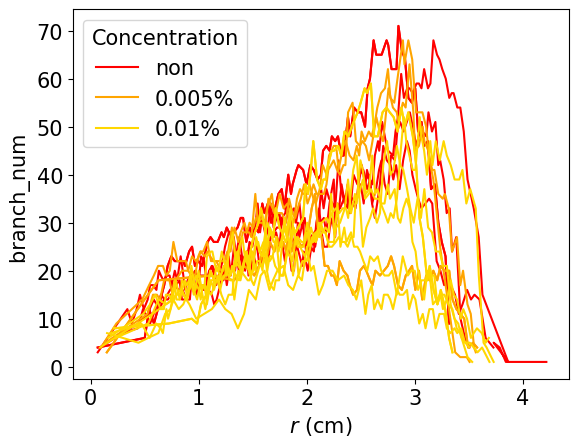

In [10]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","$\it{r}$ (cm)","area(pix)","branch_num ","branch_mean (pix)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
unit=11/681 #単位はcm/pix
i=1
j=3
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],color="r", label="")
ax.plot(fl[3][:,i]*unit,fl[3][:,j],color="r", label="non")
plt.legend()

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="orange", label="")
ax.plot(fl[4][:,i]*unit,fl[4][:,j],color="orange", label="0.005%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="gold", label="")
ax.plot(fl[7][:,i]*unit,fl[7][:,j],color="gold", label="0.01%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="m", label="",alpha=0)#透明化
#ax.plot(fl[21][:,i]*unit,fl[21][:,j],color="m", label="0.03%",alpha=0)
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="k", label="",alpha=0)
#ax.plot(fl[1][:,i]*unit,fl[1][:,j],color="k", label="0.05%",alpha=0)
plt.legend()



ax.set_xlabel(label[i])
ax.set_ylabel(label[j])
        

plt.legend(title="Concentration")
plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

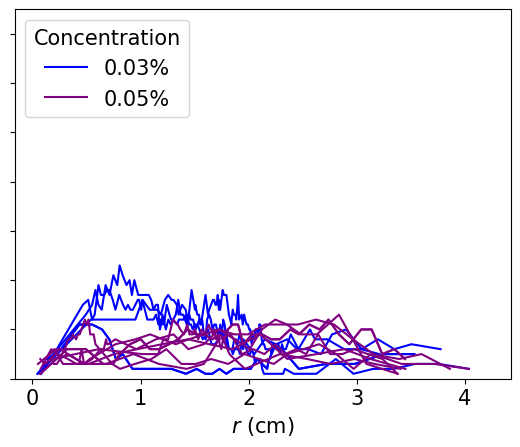

In [11]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","$\it{r}$ (cm)","area(pix)","branch_num ","branch_mean (pix)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
unit=11/681 #単位はcm/pix
i=1
j=3
fig, ax = plt.subplots()


for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],color="r", label="",alpha=0)
#ax.plot(fl[3][:,i]*unit,fl[3][:,j],color="r", label="non")
plt.legend()

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="orange", label="",alpha=0)
#ax.plot(fl[4][:,i]*unit,fl[4][:,j],color="orange", label="0.005%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="gold", label="",alpha=0)
#ax.plot(fl[7][:,i]*unit,fl[7][:,j],color="gold", label="0.01%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="b", label="")   
ax.plot(fl[21][:,i]*unit,fl[21][:,j],color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*unit,fl[k][:,j],  color="purple", label="")
ax.plot(fl[1][:,i]*unit,fl[1][:,j],color="purple", label="0.05%")
plt.legend()



ax.set_xlabel(label[i])
ax.tick_params(labelleft=False)
#ax.set_ylabel(label[j])
ax.set_ylim(0,75)
        

plt.legend(title="Concentration")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

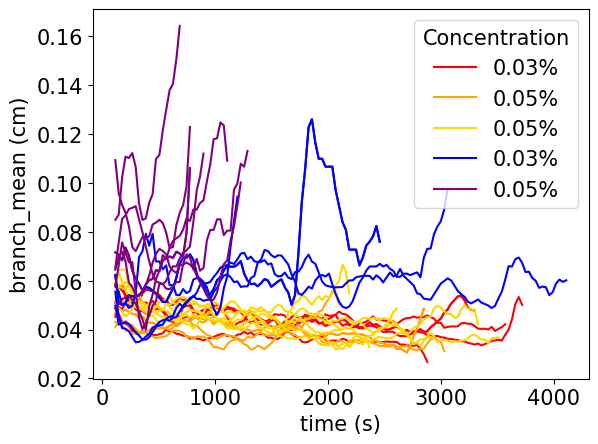

In [12]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num ","branch_mean (cm)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median

unit=11/681 #単位はcm/pix
i=4 #何について移動平均をとるか

#結局のところr-meanじゃね？
#移動平均をとる

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4): #-4なのは次元数を合わせるため
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="r", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="r", label="0.03%")
plt.legend()

for k in [4,5,6]: #0.005%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="orange", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="orange", label="0.05%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="gold", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="gold", label="0.05%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="b", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp*unit,  color="purple", label="")
ax.plot(t_tmp ,fl_tmp*unit,  color="purple", label="0.05%")
plt.legend()
    
ax.set_xlabel("time (s)")
ax.set_ylabel("branch_mean (cm)")  


#ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
#ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))   # 10^3（10の3乗）単位にする。

plt.legend(title="Concentration")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

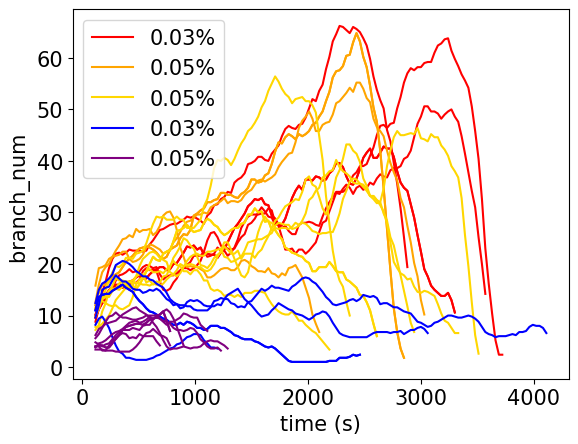

In [13]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","rmax (cm)","area(pix)","branch_num ","branch_mean (pix)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median

unit=11/681 #単位はcm/pix
i=3 #何について移動平均をとるか
#時間について本数やメジアン取るのはあまり意味がなさそう。半径横軸の方がいい感じ。meanならアリかも

#移動平均をとる

fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4): #-4なのは次元数を合わせるため
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="r", label="")
ax.plot(t_tmp ,fl_tmp,  color="r", label="0.03%")
plt.legend()

for k in [4,5,6]: #0.005%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="orange", label="")
ax.plot(t_tmp ,fl_tmp,  color="orange", label="0.05%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="gold", label="")
ax.plot(t_tmp ,fl_tmp,  color="gold", label="0.05%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="b", label="")
ax.plot(t_tmp ,fl_tmp,  color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    fl_tmp=np.convolve(fl[k][:,i],np.ones(5)/5, mode='valid')
    t_tmp=[]
    for n in range(0,len(fl[k])-4):
        t_tmp.append((n+4)*30)
    ax.plot(t_tmp ,fl_tmp,  color="purple", label="")
ax.plot(t_tmp ,fl_tmp,  color="purple", label="0.05%")
plt.legend()
    
ax.set_xlabel("time (s)")
ax.set_ylabel(label[i])  


#ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
#ax.ticklabel_format(style="sci", axis="y", scilimits=(-3,-3))   # 10^3（10の3乗）単位にする。

plt.legend()
plt.show

/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/3522985503.py:52: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="r", label="")
/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/3522985503.py:60: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="orange", label="")
/var/folders/dr/w0l5z4j55119s6104f7k49140000gn/T/ipykernel_1977/3522985503.py:68: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="gold", label="")
/var/folders/dr/w0l5z4j55119s6104f7

<function matplotlib.pyplot.show(close=None, block=None)>

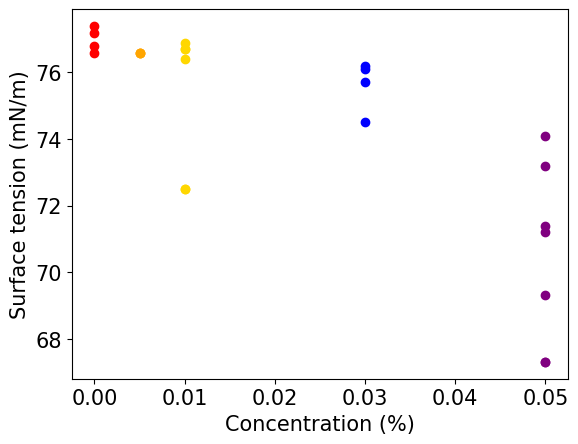

In [153]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
C=[0 , 0.005 , 0.01 , 0.03 , 0.05] #濃度リスト

label=[r"time ($\times$2 s)","rmax (pix)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)","Concentration (%)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median,6=surfactant_concentration


    


fig, ax = plt.subplots()

#nonsur
tension=[77.2,76.6,76.8,77.4]
tension=np.array(tension)
tension=tension.reshape([4,1])
c=np.full((4,1),C[0])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="r", label="")

#0.005%sur
tension=[76.6,76.6,76.6]
tension=np.array(tension)
tension=tension.reshape([3,1])
c=np.full((3,1),C[1])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="orange", label="")

#0.01%
tension=[72.5,72.5,76.4,76.7,76.7,76.9]
tension=np.array(tension)
tension=tension.reshape([6,1])
c=np.full((6,1),C[2])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="gold", label="")
    
#0.03%sur
tension=[74.5,75.7,76.1,76.2]
tension=np.array(tension)
tension=tension.reshape([4,1])
c=np.full((4,1),C[3])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="b", label="")
     
#0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    
tension=[67.3,67.3,69.3,71.4,71.2,73.2,74.1]
tension=np.array(tension)
tension=tension.reshape([7,1])
c=np.full((7,1),C[4])
tension=np.append(tension,c,axis=1)
ax.plot(tension[:,1],tension[:,0],"-o",ls="",color="purple", label="")
    


ax.set_xlabel("Concentration (%)")
ax.set_ylabel("Surface tension (mN/m)")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

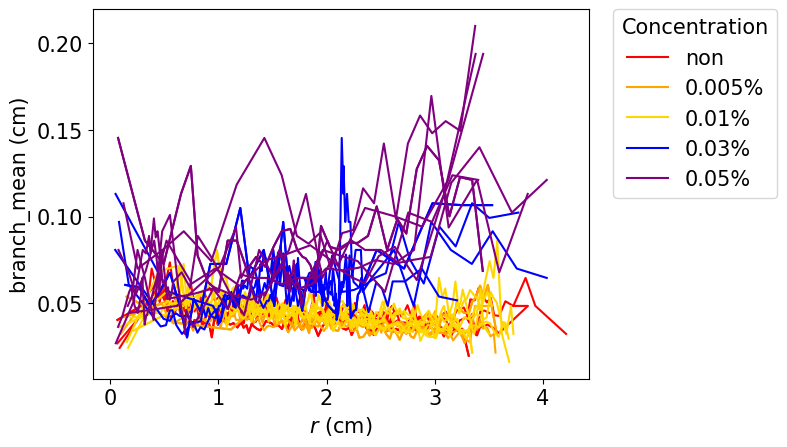

In [23]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
label=["time (s)","$\it{r}$ (cm)","area(pix)","branch_num ","branch_mean (cm)","branch_median (pix)"]

#表示する値,0=time,1=rmax,2=area,3=branch_num,4=branch_mean,5=branch_median
unit=11/681 #単位はcm/pix
i=1
j=4
fig, ax = plt.subplots()
for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,color="r", label="")
ax.plot(fl[3][:,i]*unit,fl[3][:,j]*unit,color="r", label="non")
plt.legend()

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,  color="orange", label="")
ax.plot(fl[4][:,i]*unit,fl[4][:,j]*unit,color="orange", label="0.005%")
plt.legend()

for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,  color="gold", label="")
ax.plot(fl[7][:,i]*unit,fl[7][:,j]*unit,color="gold", label="0.01%")
plt.legend()

for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,  color="b", label="")
ax.plot(fl[21][:,i]*unit,fl[21][:,j]*unit,color="b", label="0.03%")
plt.legend()

for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
    ax.plot(fl[k][:,i]*unit,fl[k][:,j]*unit,  color="purple", label="")
ax.plot(fl[1][:,i]*unit,fl[1][:,j]*unit,color="purple", label="0.05%")
plt.legend()



ax.set_xlabel(label[i])
ax.set_ylabel(label[j])
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Concentration")
plt.show

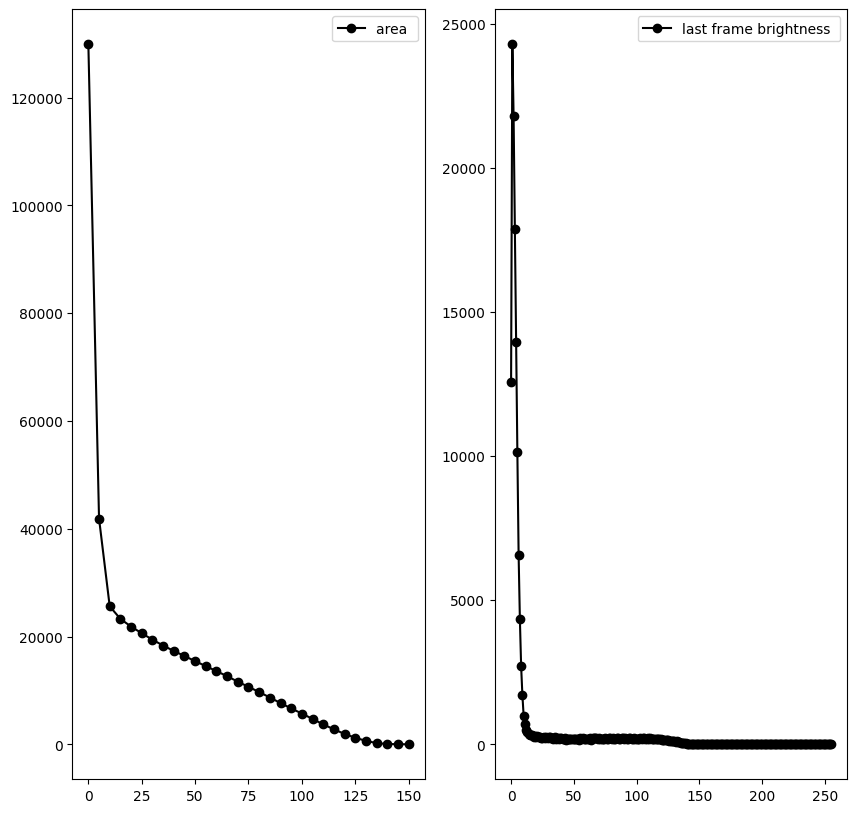

In [42]:
cutoff = np.loadtxt("test_cutoff.dat")
bright=np.loadtxt("test_brightness.dat")

fig = plt.figure(figsize=(10,10))
fl1 = fig.add_subplot(121)
fl1.plot(cutoff[:,0],cutoff[:,1], "o-", color="k", label="area ")#cutoffを変えた時の最後のフレームの面積
#plt.xlim(5, 100)
plt.legend()

fl2 = fig.add_subplot(122)
fl2.plot(bright[:,0],bright[:,1], "o-", color="k", label="last frame brightness ")#最終フレームの輝度値
#plt.xlim(120,165)
plt.legend()
plt.show()

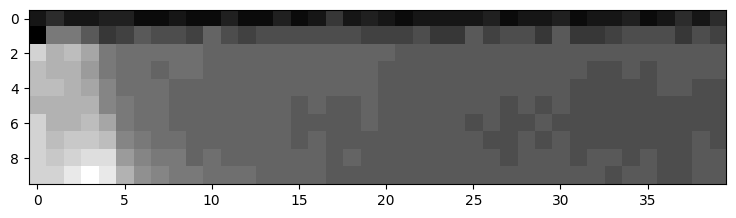

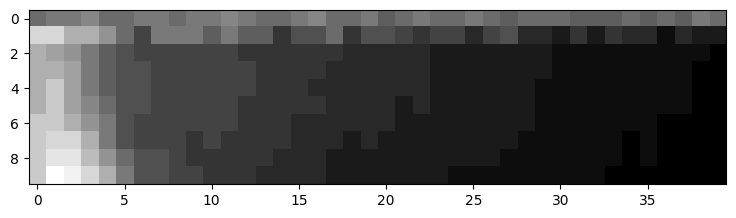

In [115]:
center0 = np.loadtxt("test_center0.dat")

# カラーマップ作成
fig = plt.figure(figsize=(9, 9))
plt.imshow(center0, cmap="gray")
plt.show()
#fig.savefig("./densim_plot/" + pr + ".png")

center1 = np.loadtxt("test_center1.dat")

# カラーマップ作成
fig = plt.figure(figsize=(9, 9))
plt.imshow(center1, cmap="gray")
plt.show()
#fig.savefig("./densim_plot/" + pr + ".png")
plt.close()

In [126]:
#以下備忘録兼ゴミおきば

#fig,ax=plt.subplots()
#vmin=-1, vmax=1, c=y, cmap=cm.seismic

#以下色分けできるコード
#color=[67.3 , 67.3 , 67.3 , 77.2 ,76.6 ,76.6 , 76.6 , 72.5 , 71.4 , 71.2 , 71.4]　 #色分け用配列
"""
label=["time ","rmax","area","branch_num","branch_mean","branch_median"]


ax.set(xlim=(0,1600),ylim=(0,24000),xlabel=label[i],ylabel=label[j])
#xlim=(0,1600),ylim=(0,24000),
x=[]
y=[]
for k in fl:
    x.append(k[:,i])
    y.append(k[:,j])
lc=multiline(x,y,color,ax=ax,cmap="viridis")
axcb=fig.colorbar(lc,ax=ax)
#ax.plot(fl4[:,i],fl4[:,j], "o-", color="m", label=" ")
#plt.set_xlabel(label[0])
#plt.


"""
#plt.legend()


iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [ ]:
"""
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24]

fig, ax = plt.subplots()


for k in [3,14,15,16]: #nonsur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")

for k in [4,5,6]: #0.005%sur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")
    
for k in [7,8,12,13,17,18]: #0.01%sur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")
    
for k in [21,22,23,24]: #0.03%sur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")   

for k in [0,1,2,9,10,11,19,20]: #0.05%sur
    ax.plot(fl[k][:,i],fl[k][:,j], "o-", color="c", label="")   

    

#nonsur
ax.plot(fl3[:,i],fl3[:,j], "o-", color="c", label="")

ax.plot(fl14[:,i],fl14[:,j], "o-", color="c", label=" ")
ax.plot(fl15[:,i],fl15[:,j], "o-", color="c", label=" ")
ax.plot(fl16[:,i],fl16[:,j], "o-", color="c", label="")


#0.005%sur
ax.plot(fl4[:,i],fl4[:,j], "o-", color="b", label=" ")
ax.plot(fl5[:,i],fl5[:,j], "o-", color="b", label="")
ax.plot(fl6[:,i],fl6[:,j], "o-", color="b", label=" ")

#0.01%sur
ax.plot(fl7[:,i],fl7[:,j], "o-", color="r", label="")
ax.plot(fl8[:,i],fl8[:,j], "o-", color="r", label=" ")

ax.plot(fl12[:,i],fl12[:,j], "o-", color="r", label="")
ax.plot(fl13[:,i],fl13[:,j], "o-", color="r", label=" ")

ax.plot(fl17[:,i],fl17[:,j], "o-", color="r", label=" ")
ax.plot(fl18[:,i],fl18[:,j], "o-", color="r", label=" ")

#0.03%sur
ax.plot(fl21[:,i],fl21[:,j], "o-", color="m", label=" ")
ax.plot(fl22[:,i],fl22[:,j], "o-", color="m", label="")
ax.plot(fl23[:,i],fl23[:,j], "o-", color="m", label=" ")
ax.plot(fl24[:,i],fl24[:,j], "o-", color="m", label=" ")

#0.05%sur
ax.plot(fl0[:,i],fl0[:,j], "o-",color="k", label=" ")
ax.plot(fl1[:,i],fl1[:,j], "o-", color="k", label="")
ax.plot(fl2[:,i],fl2[:,j], "o-", color="k", label=" ")

ax.plot(fl9[:,i],fl9[:,j], "o-", color="k", label="")
ax.plot(fl10[:,i],fl10[:,j], "o-", color="k", label=" ")
ax.plot(fl11[:,i],fl11[:,j], "o-", color="k", label=" ")

ax.plot(fl19[:,i],fl19[:,j], "o-", color="k", label="")
ax.plot(fl20[:,i],fl20[:,j], "o-", color="k", label=" ")



label=[r"time ($\times$0.5 min)","rmax (pix)","areapix","branch_num (pix)","branch_mean (pix)","branch_median (pix)"]
ax.set_xlabel(label[i])
ax.set_ylabel(label[j])

"""


In [ ]:
fl0= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.1.dat")
fl1= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.2.dat")
fl2= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230204_0.05sur_67.3mN_No.4.dat")

fl3= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230205_nonsur_77.2mN_No.1.dat")

fl4= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.1.dat")
fl5= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.2.dat")
fl6= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230206_0.005sur_76.6mN_No.4.dat")

fl7= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.1.dat")
fl8= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.01sur_72.5mN_No.2.dat")
fl9= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_69.3mN_No.3.dat")
fl10= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.4mN_No.4.dat")
fl11= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230213_0.05sur_71.2mN_No.5.dat")

fl12= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.4mN_No.4.dat")
fl13= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_0.01sur_76.7mN_No.5.dat")
fl14= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.6mN_No.2.dat")
fl15= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_76.8mN_No.1.dat")
fl16= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230221_nonsur_77.4mN_No.3.dat")

fl17= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.7mN_No.2.dat")
fl18= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.01sur_76.9mN_No.1.dat")
fl19= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_73.2mN_No.3.dat")
fl20= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230222_0.05sur_74.1mN_No.4.dat")

fl21= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_74.5mN_No.1.dat")
fl22= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_75.7mN_No.4.dat")
fl23= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.1mN_No.3.dat")
fl24= np.loadtxt("/Volumes/HDPH-UT/dendrite_data/edited_data/analisys_data/20230223_0.03sur_76.2mN_No.2.dat")

fl=[fl0,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,fl9,fl10,fl11,fl12,fl13,fl14,fl15,fl16,fl17,fl18,fl19,fl20,fl21,fl22,fl23,fl24] #データリスト
C=[0 , 0.005 , 0.01 , 0.03 , 0.05] #濃度リスト

label=[r"time ($\times$2 s)","rmax (pix)","area(pix)","branch_num (pix)","branch_mean (pix)","branch_median (pix)","Concentration (%)"]

#表示する値,0=time, 1=rmax, 2=area, 3=branch_num, 4=branch_mean, 5=branch_median, 6=surfactant_concentration
#sec=250
i=6
j=3
#t=int(sec/15)   

#for t in range(0,)

for t in range(1,137,15):  
    fig, ax = plt.subplots()
    for k in [3,14,15,16]: #nonsur,fl15はrmaxに変な飛びがある
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[0])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j],"o-",color="c", label="")

    for k in [4,5,6]: #0.005%sur
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[1])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j], "o-", color="b", label="")

    for k in [7,8,12,13,17,18]: #0.01%sur
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[2])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j],  "o-",color="r", label="")

    for k in [21,22,23,24]: #0.03%sur
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[3])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j], "o-", color="m", label="")   

    for k in [1,2,9,10,11,19,20]: #0.05%sur,fl0はmeanにエラーと思われる値が入っているので除く
        if len(fl[k])>t:
            c=np.full((len(fl[k]),1),C[4])
            fl[k]=np.append(fl[k],c,axis=1)
            ax.plot(fl[k][t,i],fl[k][t,j],  "o-",color="k", label="")
            
    sec=t*15
    ax.set_xlabel(label[i])
    ax.set_ylabel(label[j])
    ax.set_title("t="+str(sec) +"s")

plt.legend()
plt.show